## Practical Work 2

For this practical work, the trainees will have to develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.
##### Please notice that we will apply these algorithm to single variable LR.

#### Import numpy, matplotlib.pyplot and make it inline

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

To have a dataset or set of data points, the trainee must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that:
<b>yi = a*xi + b (and a = -2, b = 1)</b>


In [20]:
X = np.linspace(0,20)
X

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [21]:
X.shape

(50,)

In [22]:
a=-2
b=1
y=a*X+b
y

array([  1.        ,   0.18367347,  -0.63265306,  -1.44897959,
        -2.26530612,  -3.08163265,  -3.89795918,  -4.71428571,
        -5.53061224,  -6.34693878,  -7.16326531,  -7.97959184,
        -8.79591837,  -9.6122449 , -10.42857143, -11.24489796,
       -12.06122449, -12.87755102, -13.69387755, -14.51020408,
       -15.32653061, -16.14285714, -16.95918367, -17.7755102 ,
       -18.59183673, -19.40816327, -20.2244898 , -21.04081633,
       -21.85714286, -22.67346939, -23.48979592, -24.30612245,
       -25.12244898, -25.93877551, -26.75510204, -27.57142857,
       -28.3877551 , -29.20408163, -30.02040816, -30.83673469,
       -31.65306122, -32.46938776, -33.28571429, -34.10204082,
       -34.91836735, -35.73469388, -36.55102041, -37.36734694,
       -38.18367347, -39.        ])

### Plot X vs. y

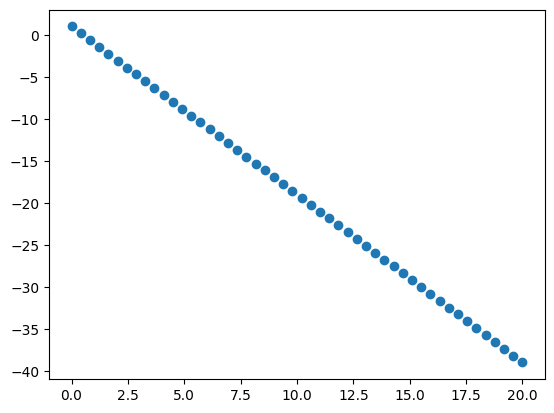

In [23]:
plt.scatter(X,y)

#### Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Implement the stop criteria (Gradient Check).
#### Implement the convergence check (cost check).
#### You can use any small values for stop criteria and convergence check. However, the used values in the current implementation used 0.001 for both.

In [24]:
def gradient_descent(X, y, alpha=0.001, max_iter=300, grad_check=0.001, cost_check=0.001):
    theta_0=0
    theta_1=0,
    loss_list = []
    thetas_0 = []
    thetas_1 = []
    m = len(X)
    for i in range(max_iter):
        h_x = theta_0 + theta_1 * X
        error = h_x - y
        loss = (1/(2*m)) * np.sum(error**2)
        thetas_0.append(theta_0)
        thetas_1.append(theta_1)
        loss_list.append(loss)
        gradient_0 = (1/m) * np.sum(error)
        gradient_1 = (1/m) * np.sum(error * X)

        if abs(gradient_0) < grad_check and abs(gradient_1) < grad_check:
            print(f"Gradient Descent converged at iteration {i}")
            break

        theta_0 = theta_0 - alpha * gradient_0
        theta_1 = theta_1 - alpha * gradient_1

        if i != 0 and abs(loss_list[-1] - loss_list[-2]) < cost_check:
            print(f"Converged at iteration {i+1}")
            break

    return thetas_0, theta_0, theta_1, thetas_1, loss_list, h_x, error, loss

thetas_0, theta_0,theta_1, thetas_1, loss_list, h_x,error, loss = gradient_descent(X, y)

Converged at iteration 41


In [25]:
theta_0

-0.13014425500946894

In [26]:
theta_1

array([-1.91100127])

In [ ]:
h_x

array([ -0.13037674,  -0.9100547 ,  -1.68973267,  -2.46941063,
        -3.24908859,  -4.02876656,  -4.80844452,  -5.58812248,
        -6.36780045,  -7.14747841,  -7.92715637,  -8.70683433,
        -9.4865123 , -10.26619026, -11.04586822, -11.82554619,
       -12.60522415, -13.38490211, -14.16458007, -14.94425804,
       -15.723936  , -16.50361396, -17.28329193, -18.06296989,
       -18.84264785, -19.62232581, -20.40200378, -21.18168174,
       -21.9613597 , -22.74103767, -23.52071563, -24.30039359,
       -25.08007155, -25.85974952, -26.63942748, -27.41910544,
       -28.19878341, -28.97846137, -29.75813933, -30.5378173 ,
       -31.31749526, -32.09717322, -32.87685118, -33.65652915,
       -34.43620711, -35.21588507, -35.99556304, -36.775241  ,
       -37.55491896, -38.33459692])

In [ ]:
error

array([-1.13037674, -1.09372817, -1.05707961, -1.02043104, -0.98378247,
       -0.9471339 , -0.91048534, -0.87383677, -0.8371882 , -0.80053963,
       -0.76389106, -0.7272425 , -0.69059393, -0.65394536, -0.61729679,
       -0.58064823, -0.54399966, -0.50735109, -0.47070252, -0.43405396,
       -0.39740539, -0.36075682, -0.32410825, -0.28745968, -0.25081112,
       -0.21416255, -0.17751398, -0.14086541, -0.10421685, -0.06756828,
       -0.03091971,  0.00572886,  0.04237742,  0.07902599,  0.11567456,
        0.15232313,  0.1889717 ,  0.22562026,  0.26226883,  0.2989174 ,
        0.33556597,  0.37221453,  0.4088631 ,  0.44551167,  0.48216024,
        0.5188088 ,  0.55545737,  0.59210594,  0.62875451,  0.66540308])

In [ ]:
loss

0.16687717500799548

#### Calculate r2 score

In [27]:
from sklearn.metrics import r2_score
r2_score(y,h_x)

0.9975950054190024

##### It is recommended to define a function for each plot. This will help you to easly plot the learning curves when you use different values of hyperparameters.

#### Plot loss vs. epochs

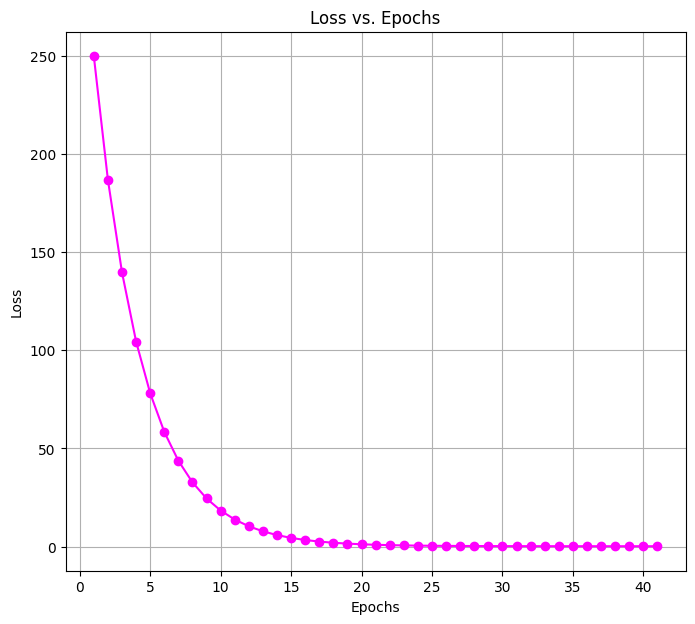

In [38]:
def loss_vs_epochs(loss_list):
    epochs = range(1, len(loss_list) + 1)
    plt.figure(figsize=(8, 7))
    plt.plot(epochs, loss_list, marker='o', linestyle='-',color='magenta')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Loss vs. Epochs')
    plt.grid(True)
    plt.show()
loss_vs_epochs(loss_list)

In [ ]:
import plotly.graph_objs as go

def loss_vs_epochs_plotly(loss_list):
    epochs = list(range(1, len(loss_list) + 1))

    # Create a scatter plot
    fig = go.Figure(data=go.Scatter(x=epochs, y=loss_list, mode='lines+markers', marker=dict(color='magenta')))

    # Update layout
    fig.update_layout(
        title='Loss vs. Epochs',
        xaxis=dict(title='Epochs'),
        yaxis=dict(title='Loss'),
        showlegend=False,
        template='plotly_white'
    )

    fig.show()

loss_vs_epochs_plotly(loss_list)

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

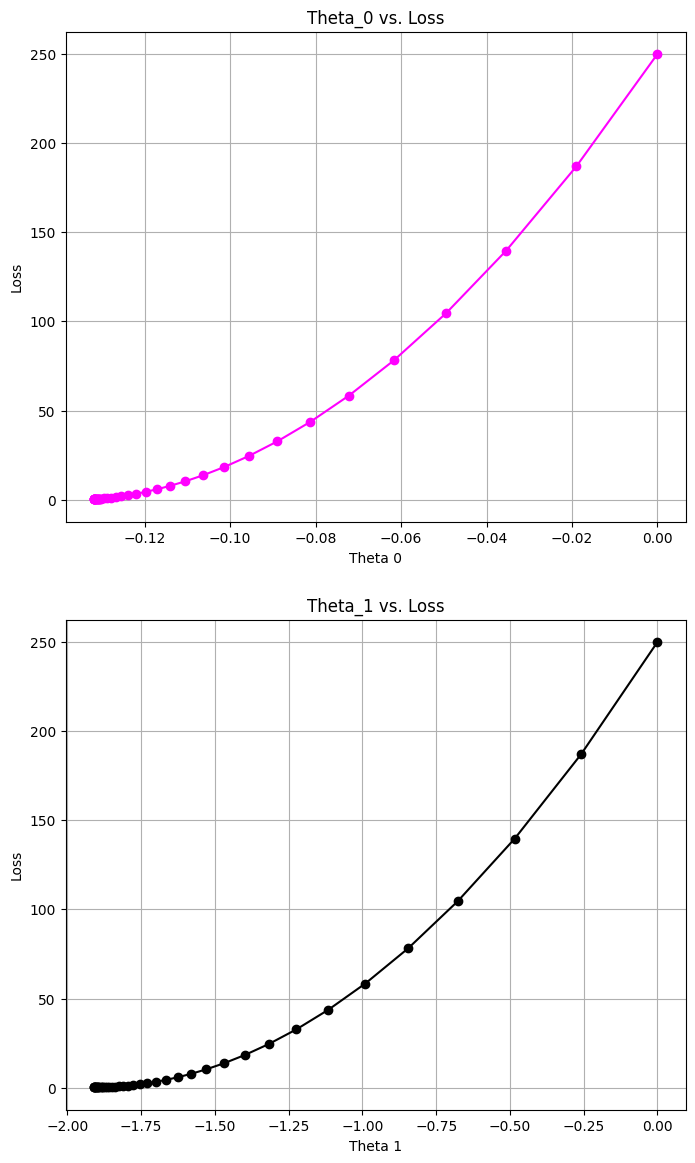

In [41]:
def theta_vs_loss(theta_0,theta_1,loss_list):
  epochs = range(1, len(loss_list) + 1)
  plt.figure(figsize=(8, 14))
  plt.subplot(2,1,1)
  plt.plot(thetas_0, loss_list, marker='o', linestyle='-',color='magenta')
  plt.xlabel('Theta 0')
  plt.ylabel('Loss')
  plt.title('Theta_0 vs. Loss')
  plt.grid(True)
  plt.subplot(2,1,2)
  plt.plot(thetas_1, loss_list, marker='o', linestyle='-',color='black')
  plt.xlabel('Theta 1')
  plt.ylabel('Loss')
  plt.title('Theta_1 vs. Loss')
  plt.grid(True)
  plt.show()
theta_vs_loss(thetas_0,thetas_1,loss_list)

#### Plot all regression lines till converge

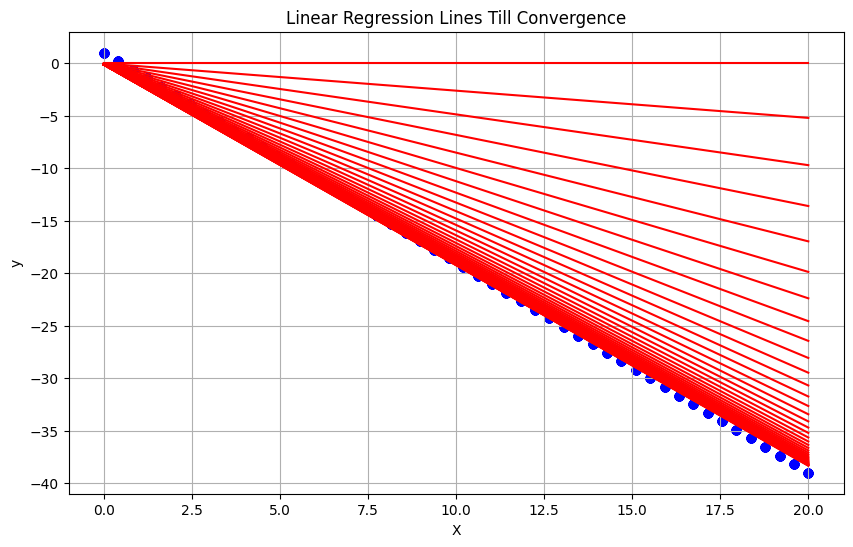

In [ ]:
def regression_lines(thetas_0, thetas_1, X, y):
    plt.figure(figsize=(10, 6))
    for i in range(len(thetas_0)):
        plt.scatter(X, y, color='blue')
        plt.plot(X, thetas_0[i] + thetas_1[i] * X,color='red')
        plt.xlabel('X')
        plt.ylabel('y')
        plt.title('Linear Regression Lines Till Convergence')
        plt.grid(True)

    plt.show()
regression_lines(thetas_0, thetas_1, X, y)

#### Plot the best regression line

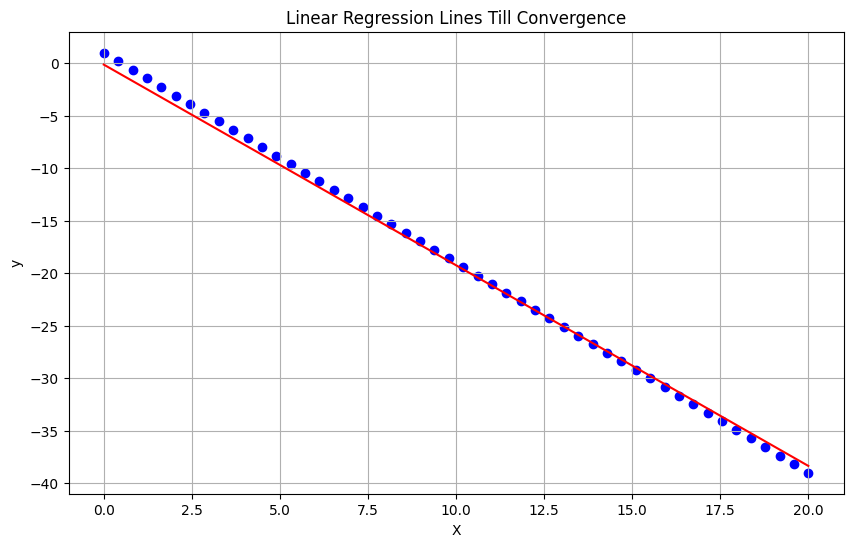

In [ ]:
def best_regression_line(theta_0, theta_1, X, y):
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue')
    plt.plot(X, theta_0 + theta_1 * X,color='red')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('Linear Regression Lines Till Convergence')
    plt.grid(True)

    plt.show()
best_regression_line(theta_0, theta_1, X, y)

#### Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

##### The following results uses alpha = 0.00005 and max. iterations = 1000.

In [ ]:
thetas_0, theta_0,theta_1, thetas_1, loss_list, h_x,error, loss = gradient_descent(X, y, alpha = 0.00005, max_iter=1000)

Converged at iteration 601


In [ ]:
r2_score(y,h_x)

0.9965793400861428

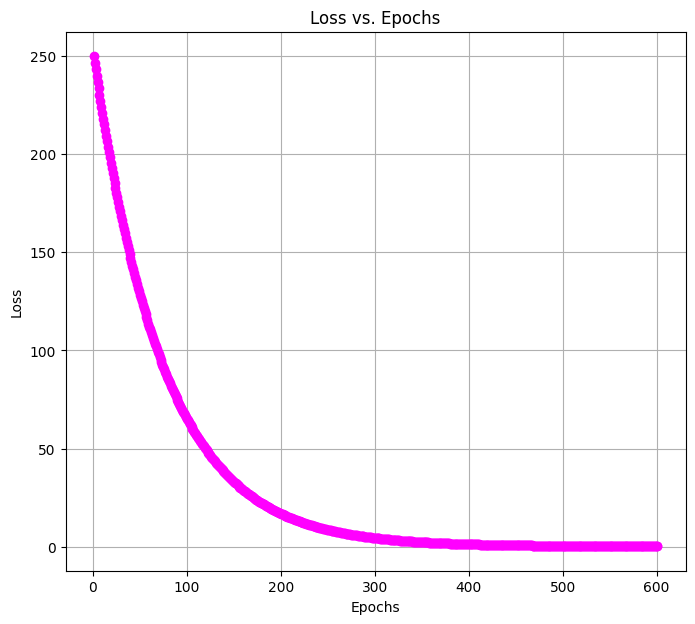

In [ ]:
loss_vs_epochs(loss_list)

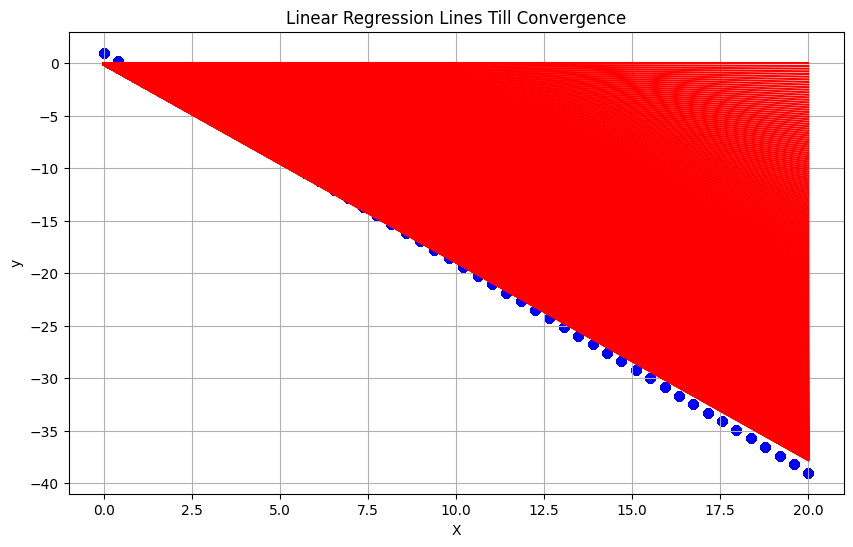

In [ ]:
regression_lines(thetas_0,thetas_1,X,y)

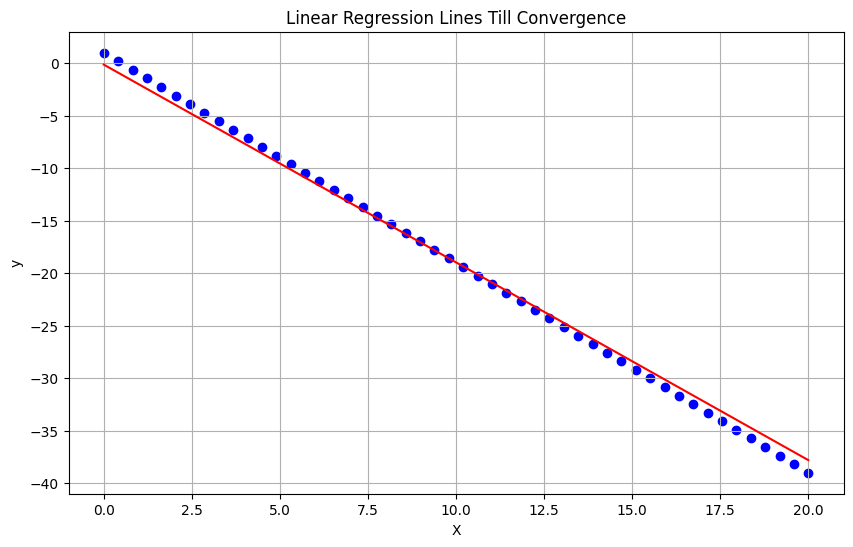

In [ ]:
best_regression_line(theta_0,theta_1,X,y)

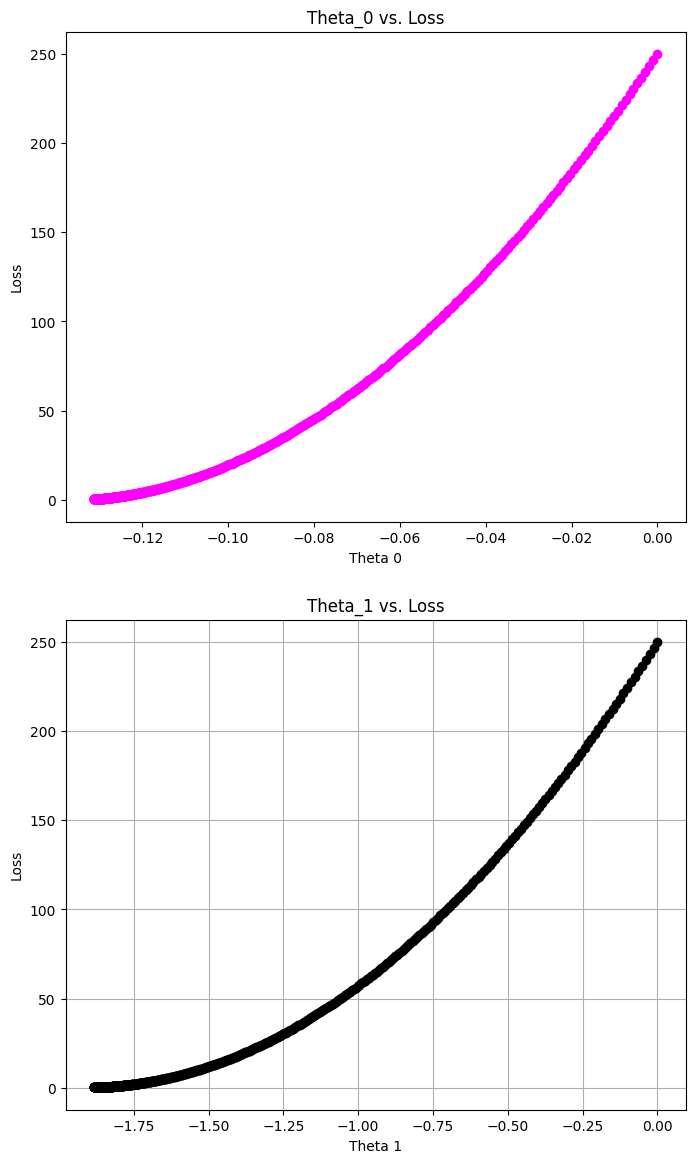

In [ ]:
theta_vs_loss(theta_0,theta_1,loss_list)

##### The following results uses alpha = 0.005 and max. iterations = 300.

In [ ]:
thetas_0, theta_0,theta_1, thetas_1, loss_list, h_x,error, loss = gradient_descent(X, y, alpha= 0.005, max_iter=300)

Converged at iteration 8


In [ ]:
r2_score(y,h_x)

0.9976200723230484

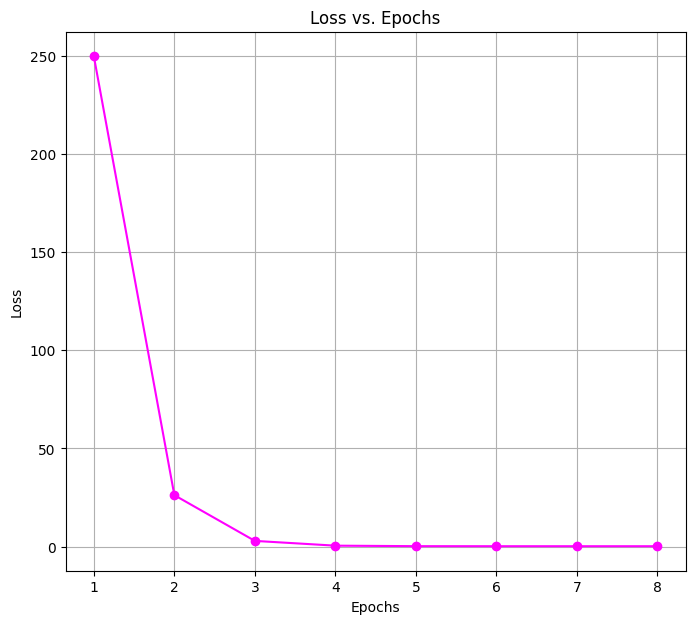

In [ ]:
loss_vs_epochs(loss_list)

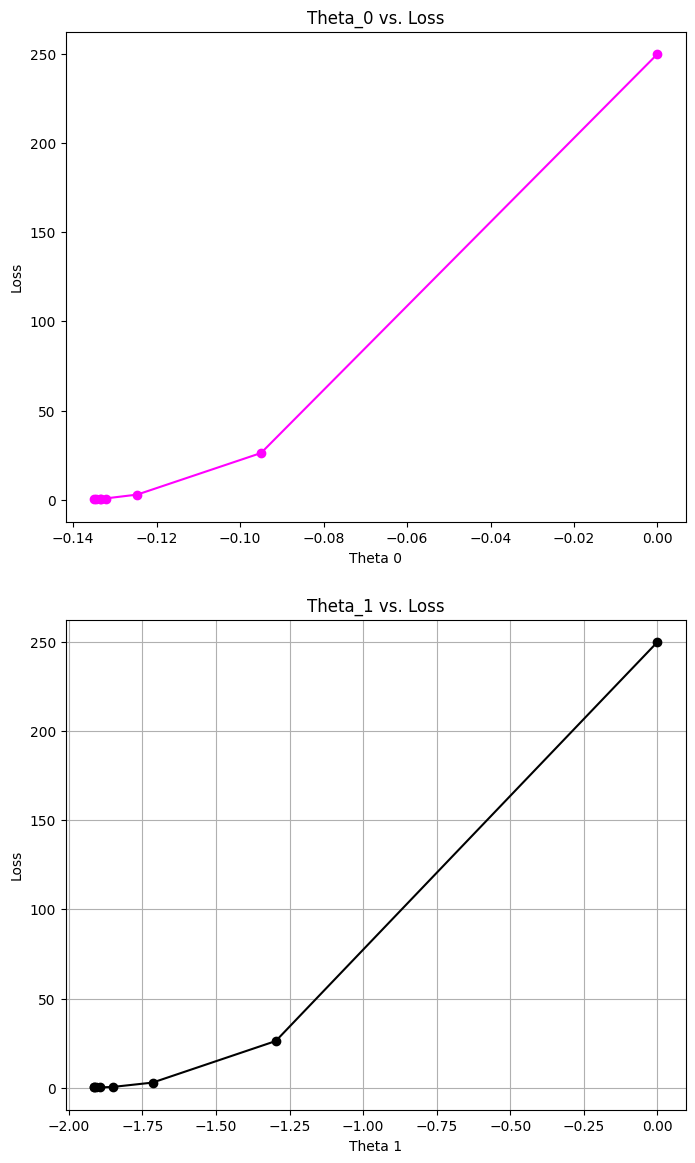

In [ ]:
theta_vs_loss(theta_0,theta_1,loss_list)

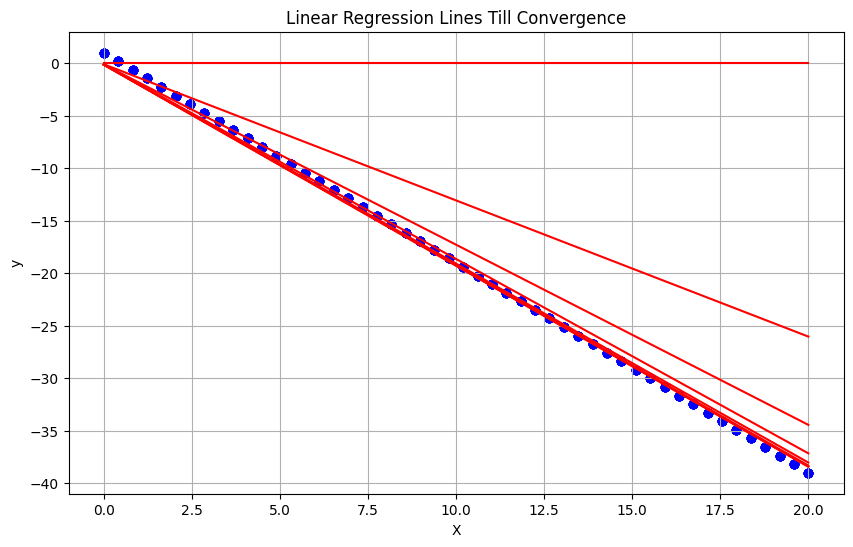

In [ ]:
regression_lines(thetas_0,thetas_1,X,y)

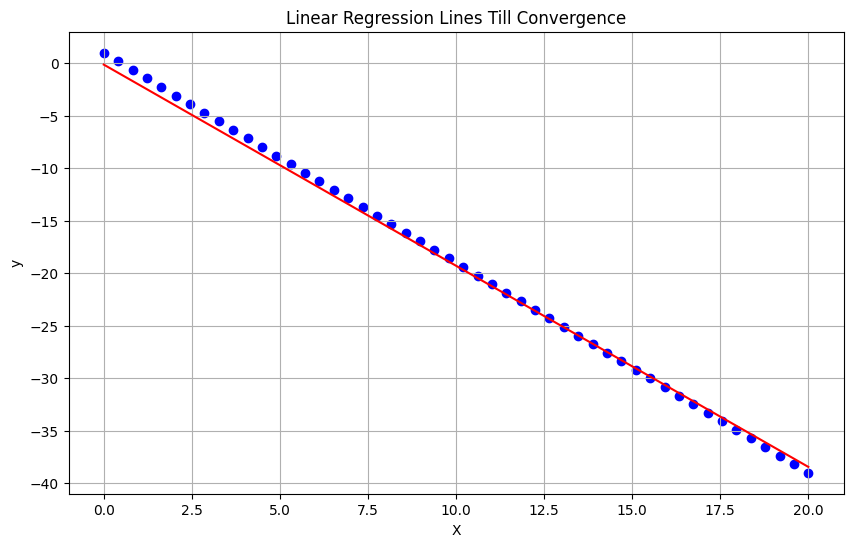

In [ ]:
best_regression_line(theta_0,theta_1,X,y)

## Stochastic GD

#### Update the implementation of the Batch GD to be Stochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to the Batch GD.
#### Do not forget to shuffle the data.

##### Very Important notes:
- <font color='red'>Save your losses and thetas for each iterations (not each epoch).</font>
- <font color='red'>Plot loss vs. iterations (not epochs). This will allow you to see the difference between SGD (stochastic GD) and batch GD.</font>
- <font color='red'>Convergence check should be performed each epoch not each iterations. This allows you to perform more accurate decision. This is because the noisy process could lead to a deciving decision.</font>
- <font color='red'>Your result may be different from the results shown below due to the randomness of the process. As well as, the random shuffle. The results will be different also for two different run of the algorithm.</font>


##### The following results uses alpha = 0.0005 and max. iterations = 300.

In [29]:
data = np.genfromtxt('MultiVarLR.csv',delimiter=',')

X = data[:,0:3]
y = data[:,3]

print(f'X:\n {X}')

y = y.reshape(-1,1)
print(f'y:\n {y}')

X:
 [[ 73.  80.  75.]
 [ 93.  88.  93.]
 [ 89.  91.  90.]
 [ 96.  98. 100.]
 [ 73.  66.  70.]
 [ 53.  46.  55.]
 [ 69.  74.  77.]
 [ 47.  56.  60.]
 [ 87.  79.  90.]
 [ 79.  70.  88.]
 [ 69.  70.  73.]
 [ 70.  65.  74.]
 [ 93.  95.  91.]
 [ 79.  80.  73.]
 [ 70.  73.  78.]
 [ 93.  89.  96.]
 [ 78.  75.  68.]
 [ 81.  90.  93.]
 [ 88.  92.  86.]
 [ 78.  83.  77.]
 [ 82.  86.  90.]
 [ 86.  82.  89.]
 [ 78.  83.  85.]
 [ 76.  83.  71.]
 [ 96.  93.  95.]]
y:
 [[152.]
 [185.]
 [180.]
 [196.]
 [142.]
 [101.]
 [149.]
 [115.]
 [175.]
 [164.]
 [141.]
 [141.]
 [184.]
 [152.]
 [148.]
 [192.]
 [147.]
 [183.]
 [177.]
 [159.]
 [177.]
 [175.]
 [175.]
 [149.]
 [192.]]


In [30]:
m = X.shape[0]
X_new = np.concatenate((np.ones((m,1)),X),axis=1)
n_1 = X_new.shape[1]

np.random.seed(101)
D = np.concatenate((X_new,y),axis=1)
print(f'Data before shuffle:\n {D}')

np.random.shuffle(D)
print(f'Data after shuffle:\n {D}')
X_sh = D[:,0:n_1]
y_sh = D[:,-1]
print(f'X shuffled:\n {X_sh}')
print(f'y shuffled:\n {y_sh}')

Data before shuffle:
 [[  1.  73.  80.  75. 152.]
 [  1.  93.  88.  93. 185.]
 [  1.  89.  91.  90. 180.]
 [  1.  96.  98. 100. 196.]
 [  1.  73.  66.  70. 142.]
 [  1.  53.  46.  55. 101.]
 [  1.  69.  74.  77. 149.]
 [  1.  47.  56.  60. 115.]
 [  1.  87.  79.  90. 175.]
 [  1.  79.  70.  88. 164.]
 [  1.  69.  70.  73. 141.]
 [  1.  70.  65.  74. 141.]
 [  1.  93.  95.  91. 184.]
 [  1.  79.  80.  73. 152.]
 [  1.  70.  73.  78. 148.]
 [  1.  93.  89.  96. 192.]
 [  1.  78.  75.  68. 147.]
 [  1.  81.  90.  93. 183.]
 [  1.  88.  92.  86. 177.]
 [  1.  78.  83.  77. 159.]
 [  1.  82.  86.  90. 177.]
 [  1.  86.  82.  89. 175.]
 [  1.  78.  83.  85. 175.]
 [  1.  76.  83.  71. 149.]
 [  1.  96.  93.  95. 192.]]
Data after shuffle:
 [[  1.  78.  75.  68. 147.]
 [  1.  69.  70.  73. 141.]
 [  1.  78.  83.  85. 175.]
 [  1.  78.  83.  77. 159.]
 [  1.  47.  56.  60. 115.]
 [  1.  86.  82.  89. 175.]
 [  1.  89.  91.  90. 180.]
 [  1.  96.  98. 100. 196.]
 [  1.  93.  88.  93. 185.]
 [  

In [33]:
alpha = 0.00001
max_epochs = 500
grad_check = 0.1
cost_check = 0.001

m = X.shape[0]
X_new = np.concatenate((np.ones((m,1)),X),axis=1)
n_1 = X_new.shape[1]
np.random.seed(101)
D = np.concatenate((X_new,y),axis=1)
np.random.shuffle(D)
X_sh = D[:,0:n_1]
y_sh = D[:,-1]

thetas = np.zeros(n_1)

thetas_all = []
loss = []

for epoch in range(max_epochs):
    print(f"****************** Epoch {epoch} ********************\n")
    for k in range(m):
        thetas_all.append(thetas)

        h= thetas @ X_sh[k]

        e = h-y_sh[k]
        j=(e**2)/(2)
        loss.append(j)

        grad = (e*X_sh[k])

        thetas =  thetas - alpha * grad



    print(f'j = {j}\n')
    grad_norm = np.linalg.norm(grad)
    print(f'Gradient Vector:\n{grad}\n')
    print(f'Gradient Vector Norm:\n{grad_norm}\n')
    opt_thetas=thetas_all[-1]
    print(f'New Thetas : {opt_thetas}\n')

    if grad_norm <grad_check:
        print(f'****************** Training Report ********************\n')
        print(f'Gradient Descent converged after {epoch+1} epochs\n')
        print(f'Optimum Thetas : {opt_thetas}\n')
        print(f'Cost = {j}\n')
        break
    elif epoch>0 and np.absolute(loss[-1] - loss[-(m+1)])<cost_check:
        print(f'****************** Training Report ********************\n')
        print(f'Gradient Descent converged after {epoch+1} epochs\n')
        print(f'Optimum Thetas : {opt_thetas}\n')
        print(f'Cost = {j}\n')
        break

****************** Epoch 0 ********************

j = 0.24204037135034231

Gradient Vector:
[ 0.69575911 48.70313788 45.22434232 51.48617433]

Gradient Vector Norm:
84.07465138146812

New Thetas : [0.00858371 0.66962122 0.6807672  0.68329489]

****************** Epoch 1 ********************

j = 0.9472218676718938

Gradient Vector:
[  1.37638793  96.34715514  89.46521549 101.85270686]

Gradient Vector Norm:
166.32097709997373

New Thetas : [0.00862376 0.67185715 0.68264611 0.68872658]

****************** Epoch 2 ********************

j = 0.961873755509241

Gradient Vector:
[  1.38699225  97.08945774  90.15449647 102.63742675]

Gradient Vector Norm:
167.60239006616783

New Thetas : [0.00862234 0.67091965 0.68134392 0.69090053]

****************** Epoch 3 ********************

j = 0.9727691998645135

Gradient Vector:
[  1.39482558  97.63779063  90.66366273 103.21709295]

Gradient Vector Norm:
168.54895939412754

New Thetas : [0.00862067 0.66997263 0.68003761 0.69304968]

*****************

In [35]:
def calc_best_fit(Ths,Xin):
    y_best_fit= Xin @ Ths
    return y_best_fit

In [36]:
y_pred_GD_Multi = calc_best_fit(thetas_all[-1],X_sh)
print(f'r squared: {r2_score(y_sh,y_pred_GD_Multi)}')

r squared: 0.9873565654534185


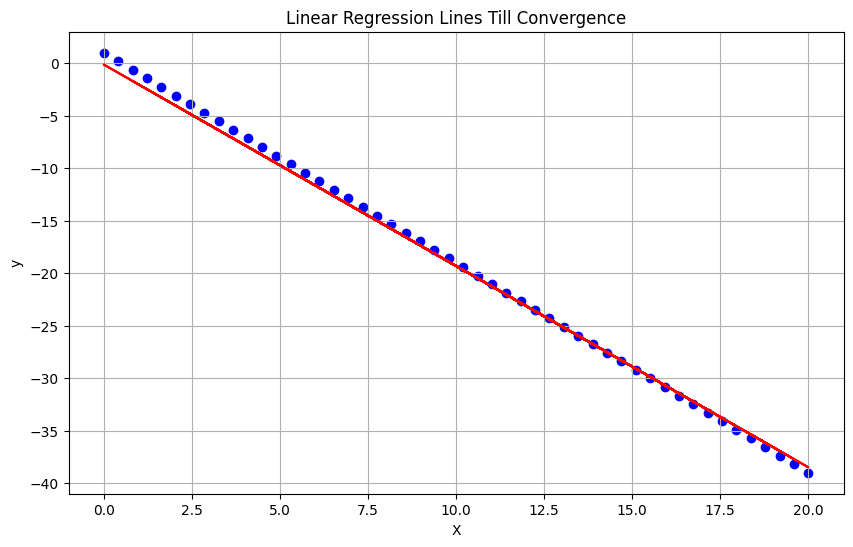

In [ ]:
best_regression_line(theta_0,theta_1,X,y)

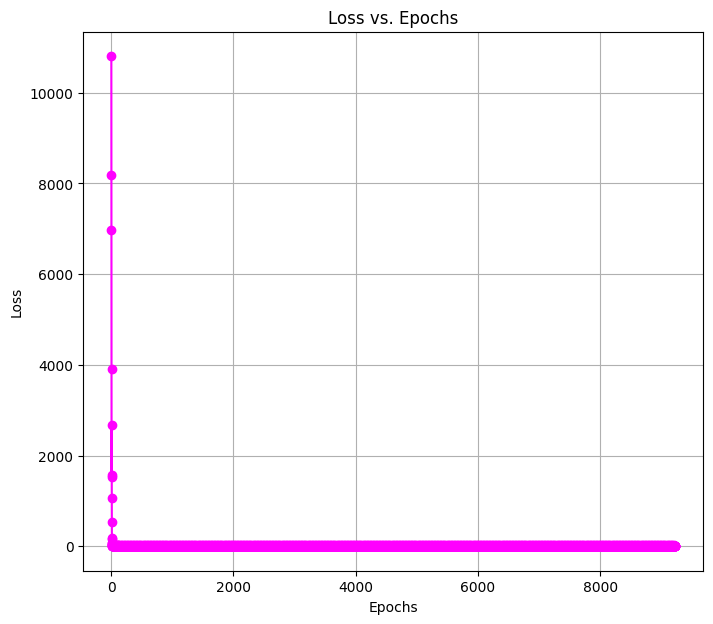

In [39]:
loss_vs_epochs(loss) #Here it's the iteration number not epochs

## Mini-Batch GD

#### Update the implementation of the Batch GD to be Mini-Batch and repeat the above plots and evaluations
#### Change batch size and see the effect
#### Do not forget to shuffle the data

##### Very Important notes:
- <font color='red'>Save your losses and thetas for each iterations (not each epoch).</font>
- <font color='red'>Plot loss vs. iterations (not epochs). This will allow you to see the difference between SGD (stochastic GD) and batch GD.</font>
- <font color='red'>Convergence check should be performed each epoch not each iterations. This allows you to perform more accurate decision. This is because the noisy process could lead to a deciving decision.</font>
-<font color='red'>Your result may be different from the results shown below due to the randomness of the process. As well as, the random shuffle. The results will be different also for two different run of the algorithm.</font>

In [45]:
def plot_loss(Losses,Title):
    plt.figure(figsize=(10,7))
    plt.grid()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(Losses,'-*',markersize=8)
    plt.title(Title,fontsize=16,fontweight='bold')
    plt.show()

def plot_loss_iter(Losses,Title):
    plt.figure(figsize=(10,7))
    plt.grid()
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.plot(Losses,'-*',markersize=8)
    plt.title(Title,fontsize=16,fontweight='bold')
    plt.show()

def plot_theta_loss(Th,Th_0_1,Losses,Title):
    plt.figure(figsize=(10,7))
    plt.grid()
    plt.xlabel(Th_0_1,fontsize=14,fontweight='bold')
    plt.ylabel('Loss',fontsize=14,fontweight='bold')
    plt.plot(Th,Losses,'-mo',markersize=8)
    plt.title(Title,fontsize=16,fontweight='bold')
    plt.show()

def calc_best_fit(Ths,Xin):
    y_best_fit= Xin @ Ths
    return y_best_fit

def plotReg(X,y,y_pred,Title):
    plt.figure(figsize =(10,8))
    plt.scatter(X,y)
    plt.xlabel('X')
    plt.ylabel('y')
    plt.plot(X,y_pred,'r*-')
    plt.title(Title,fontsize=16,fontweight='bold')
    plt.show()

In [46]:
data = np.genfromtxt('MultiVarLR.csv',delimiter=',')

X = data[:,0:3]
y = data[:,3]

print(f'X:\n {X}')

y = y.reshape(-1,1)
print(f'y:\n {y}')

X:
 [[ 73.  80.  75.]
 [ 93.  88.  93.]
 [ 89.  91.  90.]
 [ 96.  98. 100.]
 [ 73.  66.  70.]
 [ 53.  46.  55.]
 [ 69.  74.  77.]
 [ 47.  56.  60.]
 [ 87.  79.  90.]
 [ 79.  70.  88.]
 [ 69.  70.  73.]
 [ 70.  65.  74.]
 [ 93.  95.  91.]
 [ 79.  80.  73.]
 [ 70.  73.  78.]
 [ 93.  89.  96.]
 [ 78.  75.  68.]
 [ 81.  90.  93.]
 [ 88.  92.  86.]
 [ 78.  83.  77.]
 [ 82.  86.  90.]
 [ 86.  82.  89.]
 [ 78.  83.  85.]
 [ 76.  83.  71.]
 [ 96.  93.  95.]]
y:
 [[152.]
 [185.]
 [180.]
 [196.]
 [142.]
 [101.]
 [149.]
 [115.]
 [175.]
 [164.]
 [141.]
 [141.]
 [184.]
 [152.]
 [148.]
 [192.]
 [147.]
 [183.]
 [177.]
 [159.]
 [177.]
 [175.]
 [175.]
 [149.]
 [192.]]


In [47]:
m = X.shape[0]
X_new = np.concatenate((np.ones((m,1)),X),axis=1)
n_1 = X_new.shape[1]

np.random.seed(101)
D = np.concatenate((X_new,y),axis=1)
print(f'Data before shuffle:\n {D}')

np.random.shuffle(D)
print(f'Data after shuffle:\n {D}')
X_sh = D[:,0:n_1]
y_sh = D[:,-1].reshape(-1,1)
print(f'X shuffled:\n {X_sh}')
print(f'y shuffled:\n {y_sh}')

Data before shuffle:
 [[  1.  73.  80.  75. 152.]
 [  1.  93.  88.  93. 185.]
 [  1.  89.  91.  90. 180.]
 [  1.  96.  98. 100. 196.]
 [  1.  73.  66.  70. 142.]
 [  1.  53.  46.  55. 101.]
 [  1.  69.  74.  77. 149.]
 [  1.  47.  56.  60. 115.]
 [  1.  87.  79.  90. 175.]
 [  1.  79.  70.  88. 164.]
 [  1.  69.  70.  73. 141.]
 [  1.  70.  65.  74. 141.]
 [  1.  93.  95.  91. 184.]
 [  1.  79.  80.  73. 152.]
 [  1.  70.  73.  78. 148.]
 [  1.  93.  89.  96. 192.]
 [  1.  78.  75.  68. 147.]
 [  1.  81.  90.  93. 183.]
 [  1.  88.  92.  86. 177.]
 [  1.  78.  83.  77. 159.]
 [  1.  82.  86.  90. 177.]
 [  1.  86.  82.  89. 175.]
 [  1.  78.  83.  85. 175.]
 [  1.  76.  83.  71. 149.]
 [  1.  96.  93.  95. 192.]]
Data after shuffle:
 [[  1.  78.  75.  68. 147.]
 [  1.  69.  70.  73. 141.]
 [  1.  78.  83.  85. 175.]
 [  1.  78.  83.  77. 159.]
 [  1.  47.  56.  60. 115.]
 [  1.  86.  82.  89. 175.]
 [  1.  89.  91.  90. 180.]
 [  1.  96.  98. 100. 196.]
 [  1.  93.  88.  93. 185.]
 [  

In [48]:
thetas = np.zeros((n_1,1))
batch_size = 5
m = X.shape[0]
no_batches = m//batch_size
thetas_all=[]
loss = []

for batch in range(no_batches):
    thetas_all.append(thetas)

    start = batch * batch_size
    end = (batch + 1) * batch_size
    if batch+1 != no_batches:
        X_batch = X_sh[start:end]
        y_batch = y_sh[start:end]
    else:
        X_batch = X_sh[start:]
        y_batch = y_sh[start:]

    h= X_batch@thetas

    e = h-y_batch

    j=np.linalg.norm(e)**2/(2*len(h))
    loss.append(j)

    grad = X_batch.T@e/len(h)


    thetas =  thetas - alpha * grad

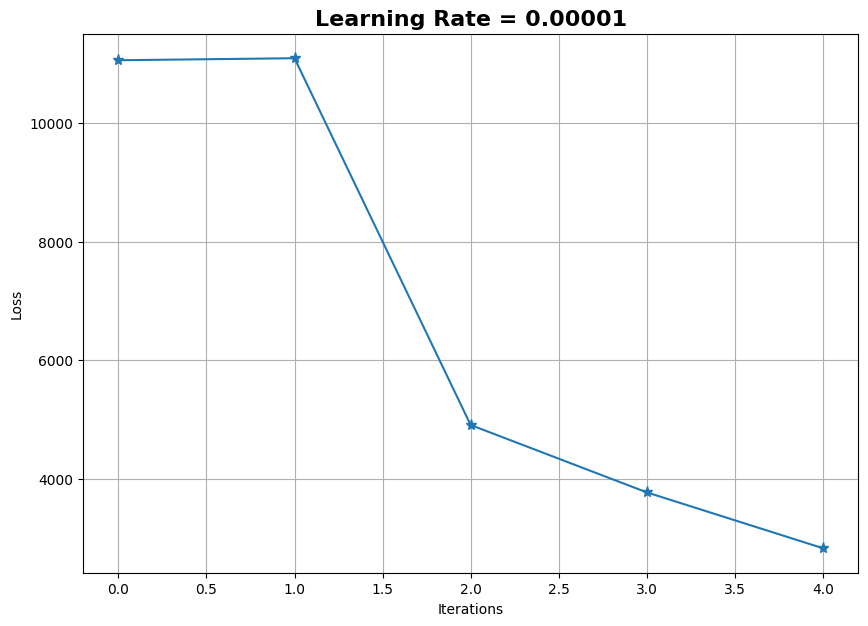

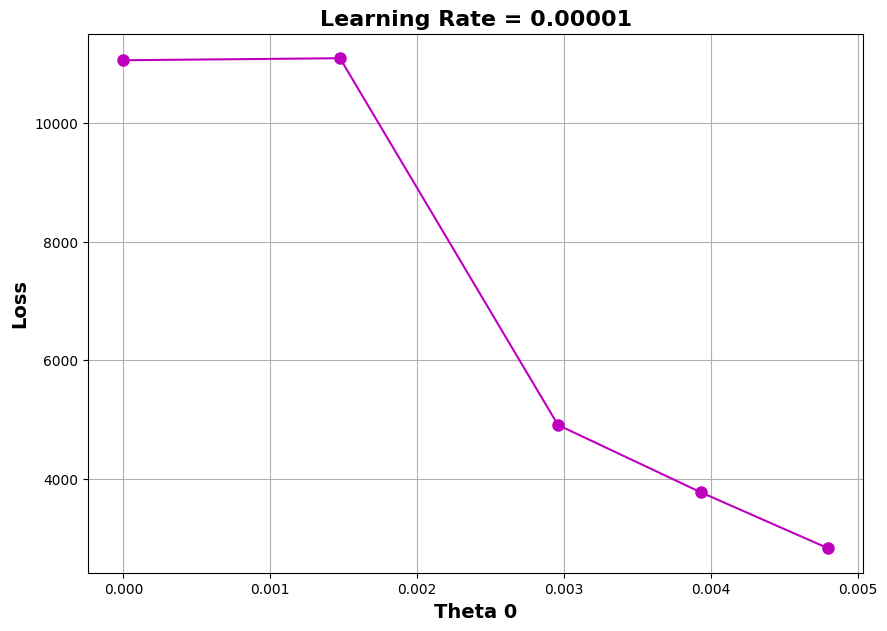

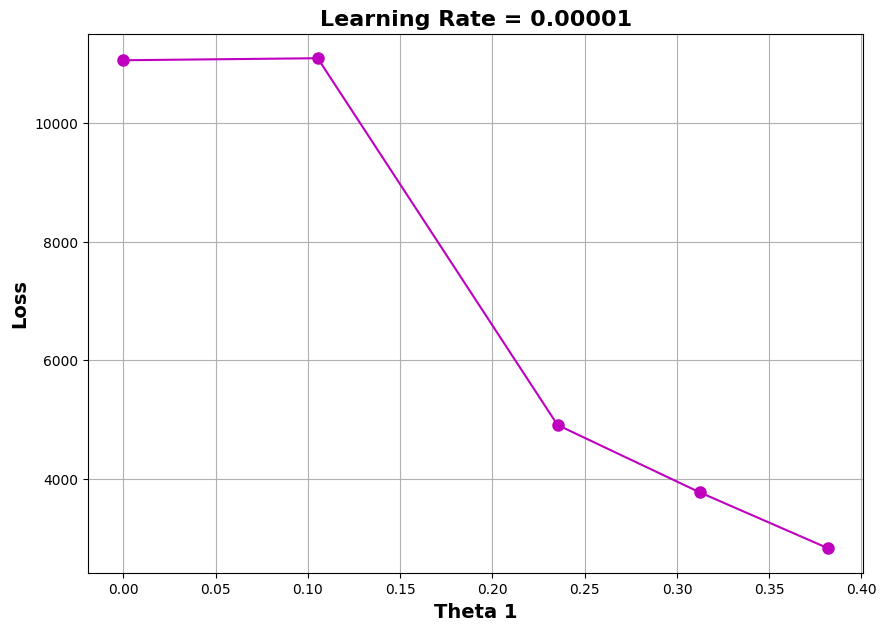

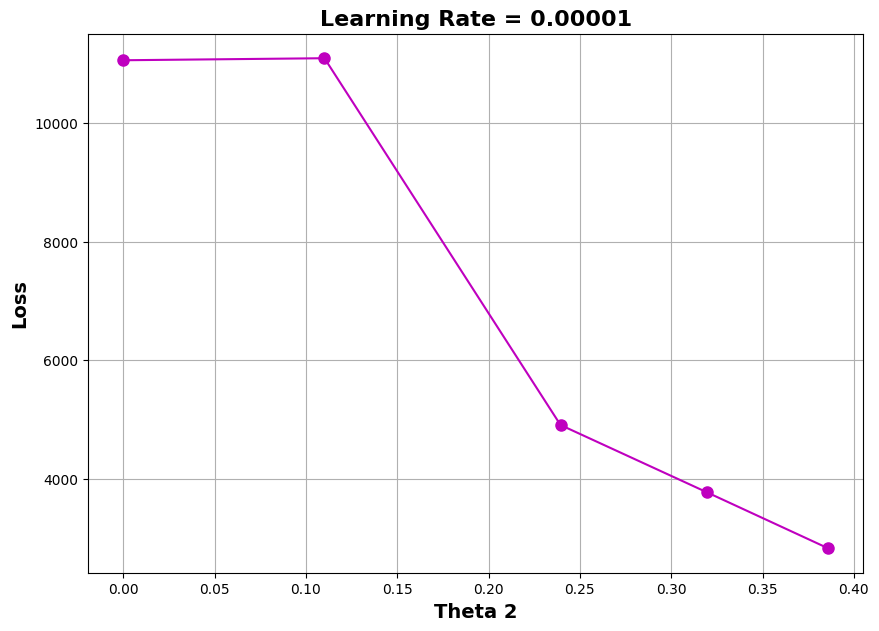

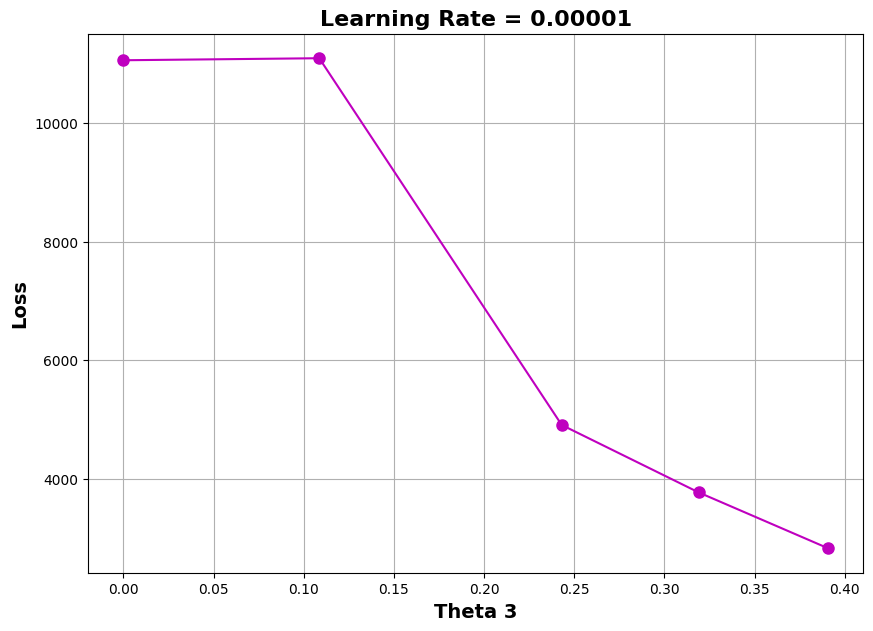

In [49]:
plot_loss_iter(loss,'Learning Rate = 0.00001')
ths_arr = np.array(thetas_all).reshape(len(thetas_all),4)
plot_theta_loss(ths_arr[:,0:1],'Theta 0',loss,'Learning Rate = 0.00001')
plot_theta_loss(ths_arr[:,1:2],'Theta 1',loss,'Learning Rate = 0.00001')
plot_theta_loss(ths_arr[:,2:3],'Theta 2',loss,'Learning Rate = 0.00001')
plot_theta_loss(ths_arr[:,3:4],'Theta 3',loss,'Learning Rate = 0.00001')

In [50]:
def MiniBatch_LR_MultiVar(X,y,batch_size,alpha=0.001,max_epochs=500,grad_check=0.001,conv_check=0.001):

    m = X.shape[0]

    X_new = np.concatenate((np.ones((m,1)),X),axis=1)
    n_1 = X_new.shape[1]

    np.random.seed(101)
    D = np.concatenate((X_new,y),axis=1)


    np.random.shuffle(D)

    X_sh = D[:,0:n_1]
    y_sh = D[:,-1].reshape(-1,1)


    thetas = np.zeros((n_1,1))

    no_batches = m//batch_size

    thetas_all = []
    loss = []


    for i in range(max_epochs):
        print(f'****************** Epoch {i} ********************\n')

        for batch in range(no_batches):
            thetas_all.append(thetas)

            start = batch * batch_size
            end = (batch + 1) * batch_size
            if batch+1 != no_batches:
                X_batch = X_sh[start:end]
                y_batch = y_sh[start:end]
            else:
                X_batch = X_sh[start:]
                y_batch = y_sh[start:]

            h= X_batch@thetas

            e = h-y_batch

            j=np.linalg.norm(e)**2/(2*len(h))
            loss.append(j)

            grad = X_batch.T@e/len(h)


            thetas =  thetas - alpha * grad



        print(f'j = {j}\n')
        grad_norm = np.linalg.norm(grad)
        print(f'Gradient Vector:\n{grad}\n')
        print(f'Gradient Vector Norm:\n{grad_norm}\n')
        opt_thetas=thetas_all[-1]
        print(f'New Thetas : {opt_thetas}\n')

        if grad_norm <grad_check:
            print(f'****************** Training Report ********************\n')
            print(f'Gradient Descent converged after {i+1} epochs\n')
            print(f'Optimum Thetas : {opt_thetas}\n')
            print(f'Cost = {j}\n')
            break
        elif i>0 and np.absolute(loss[-1] - loss[-(no_batches+1)])<conv_check:
            print(f'****************** Training Report ********************\n')
            print(f'Gradient Descent converged after {i+1} epochs\n')
            print(f'Optimum Thetas : {opt_thetas}\n')
            print(f'Cost = {j}\n')
            break

    y_best_fit = X_new@thetas_all[-1]
    return loss, thetas_all, y_best_fit

In [51]:
loss, thetas_all,y_pred = MiniBatch_LR_MultiVar(X,y,4,0.00001,10000,0.1,0.01)

****************** Epoch 0 ********************

j = 1883.7525786866881

Gradient Vector:
[[  -60.78220031]
 [-5058.34684832]
 [-5085.66878787]
 [-5368.91284939]]

Gradient Vector Norm:
8959.900642195887

New Thetas : [[0.00545451]
 [0.43544405]
 [0.4409459 ]
 [0.44537091]]

****************** Epoch 1 ********************

j = 171.23188556352972

Gradient Vector:
[[  -18.14941981]
 [-1514.94074129]
 [-1526.34988025]
 [-1610.96445522]]

Gradient Vector Norm:
2687.0662969069713

New Thetas : [[0.00752539]
 [0.60258285]
 [0.60974239]
 [0.61874659]]

****************** Epoch 2 ********************

j = 24.726198614719113

Gradient Vector:
[[  -6.58094332]
 [-553.4405051 ]
 [-560.53024829]
 [-591.24472689]]

Gradient Vector Norm:
984.9386721140315

New Thetas : [[0.00808697]
 [0.64776628]
 [0.65530752]
 [0.66617713]]

****************** Epoch 3 ********************

j = 8.396846516830298

Gradient Vector:
[[  -3.4409736 ]
 [-292.47457941]
 [-298.39050085]
 [-314.47351544]]

Gradient Vector 

r squared: 0.9786614322106626


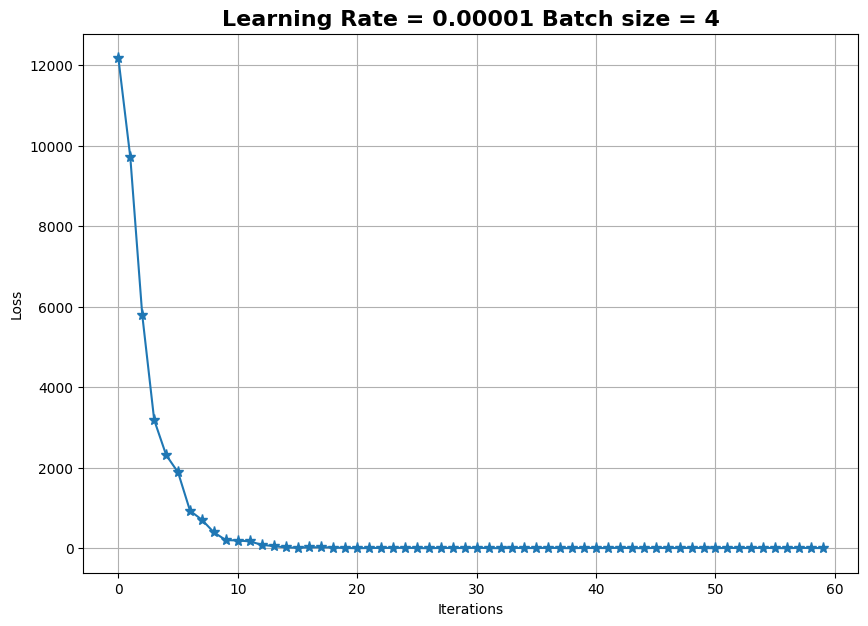

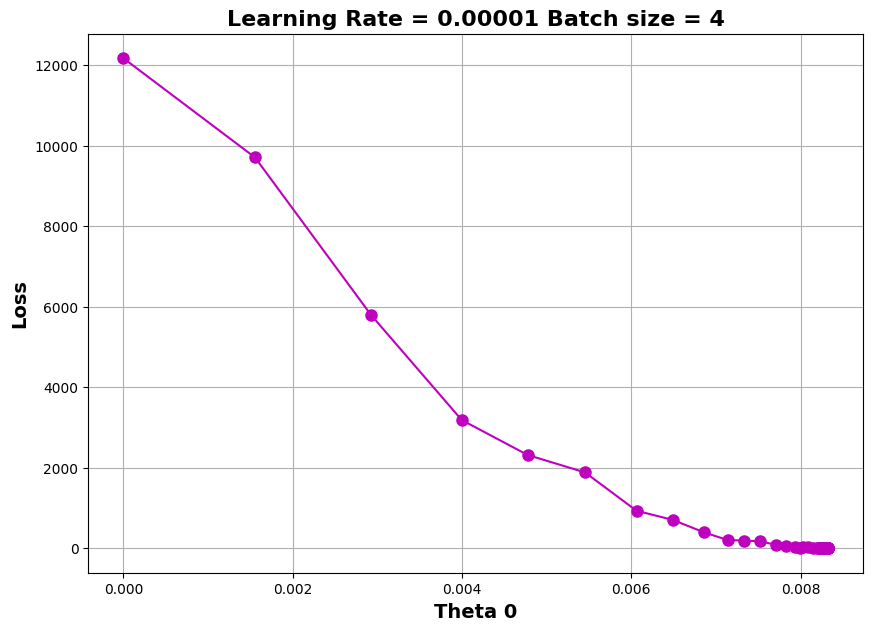

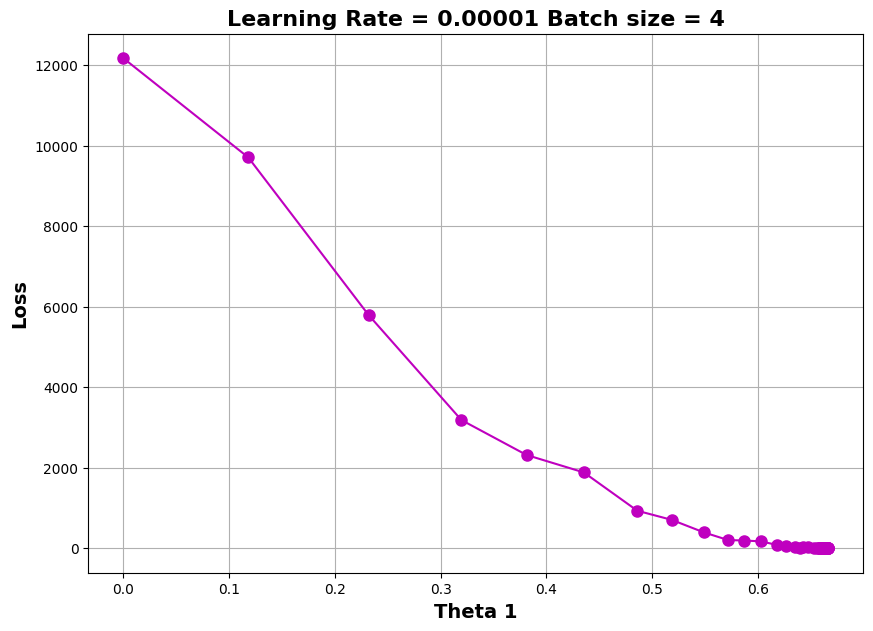

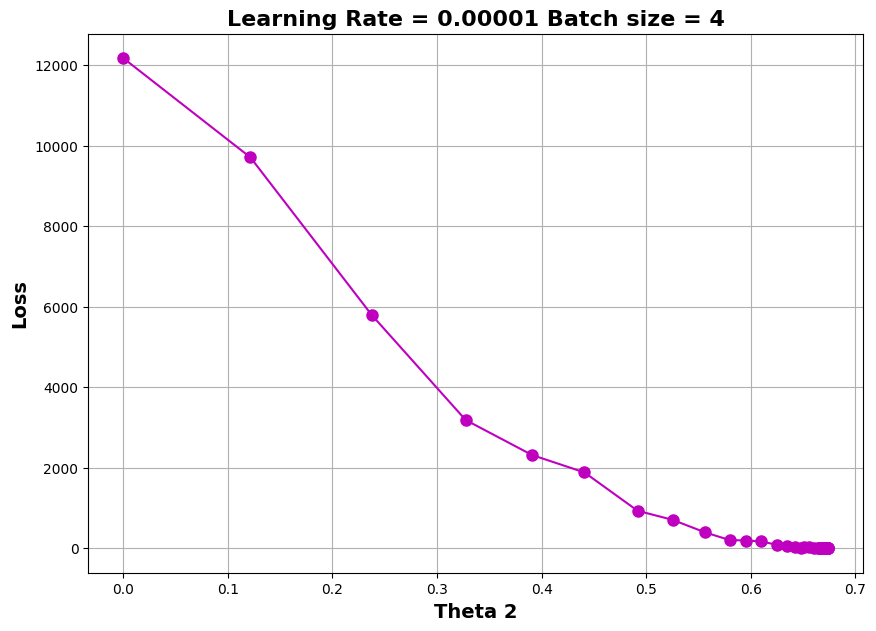

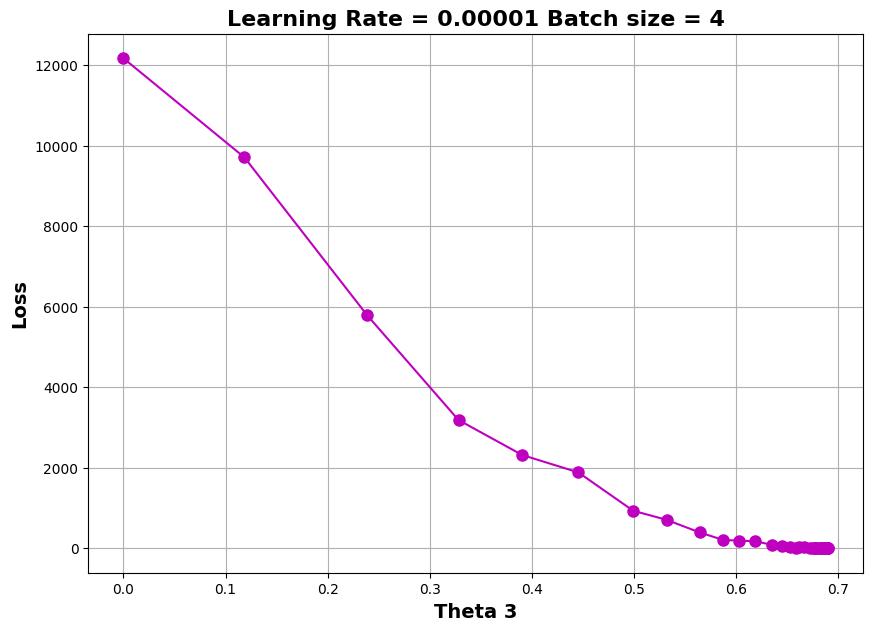

In [52]:
print(f'r squared: {r2_score(y,y_pred)}')

plot_loss_iter(loss,'Learning Rate = 0.00001 Batch size = 4')
ths_arr = np.array(thetas_all).reshape(len(thetas_all),4)
plot_theta_loss(ths_arr[:,0:1],'Theta 0',loss,'Learning Rate = 0.00001 Batch size = 4')
plot_theta_loss(ths_arr[:,1:2],'Theta 1',loss,'Learning Rate = 0.00001 Batch size = 4')
plot_theta_loss(ths_arr[:,2:3],'Theta 2',loss,'Learning Rate = 0.00001 Batch size = 4')
plot_theta_loss(ths_arr[:,3:4],'Theta 3',loss,'Learning Rate = 0.00001 Batch size = 4')